In [2]:
import pandas as pd, sqlite3, matplotlib.pyplot as plt

# Ex04. Гистограмма

## 1. Подключение к базе данных

In [3]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

## 2. Гистограмма коммитов студентов по часам в выходные и будние дни

In [4]:
commits = pd.read_sql('''
    SELECT CAST(strftime('%H', timestamp) AS INTEGER) hour,
           CAST(strftime('%u', timestamp) AS INTEGER) day
    FROM checker
    WHERE uid LIKE 'user_%'
''', conn)

In [5]:
work = commits[commits.day < 6].hour
weekend = commits[commits.day >= 6].hour

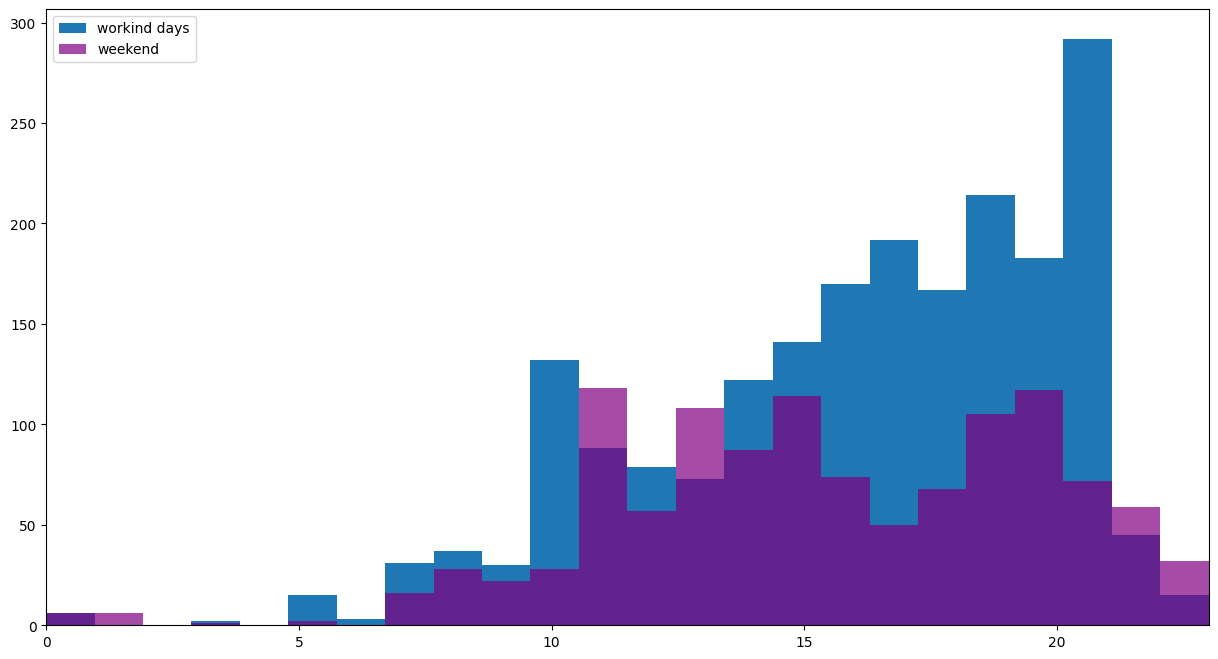

In [6]:
plt.figure(figsize=(15, 8))
plt.xlim(0, 23)
plt.hist(work, bins=24, label='workind days')
plt.hist(weekend, bins=24, alpha=0.7, color='purple', label='weekend')
plt.legend();

**Бывают ли часы, когда общее количество коммитов в выходные дни было выше, чем в рабочие?**\
Ответ: *11, 13, 22, 23*

In [ ]:
work

0        5
1        5
2        5
3        5
4        5
        ..
3202    20
3203    20
3204    20
3205    20
3206    20
Name: hour, Length: 2037, dtype: int64

In [10]:
weekend.count()

np.int64(1170)

## 3. Закрытие соединения

In [8]:
conn.close()